In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from mah import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
nsim0 = 17417
simname = "csiborg2_main"
min_logmass = 12.25

# NOTE: These can possibly be pickled to avoid doing this long process every
# single time.

cat0, catxs, merger_trees, overlaps = load_data(nsim0, simname, min_logmass)
nsimxs = [cat.nsim for cat in catxs]

2024-04-04 12:57:16.924048: loading 20 halo catalogues.
2024-04-04 12:57:16.924468: loading 20 merger trees.


Loading overlap objects: 100%|██████████| 19/19 [02:30<00:00,  7.92s/it]


In [92]:
data = extract_main_progenitor_maxoverlap(100, overlaps, merger_trees)

Calculating maximum overlap:   0%|          | 0/19 [00:00<?, ?it/s]

Cross main progenitors: 100%|██████████| 19/19 [00:15<00:00,  1.22it/s]


Appending main progenitor for 17417.


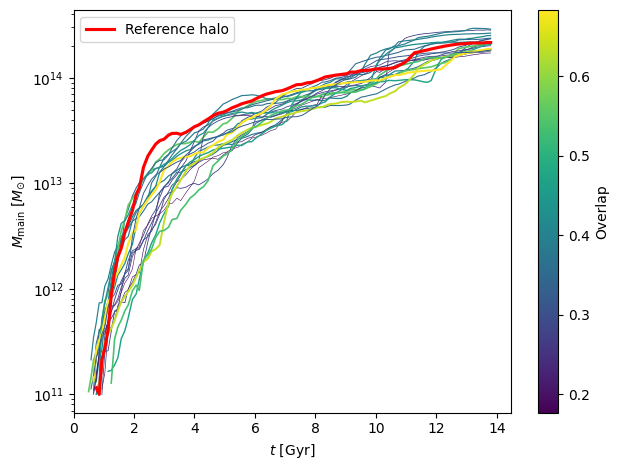

In [97]:

cmap = plt.cm.viridis

x = np.asarray([data[nsimx]["Overlap"] for nsimx in nsimxs if nsimx in data])
w = x - x.min()
w /= w.max()

norm = Normalize(vmin=x.min(), vmax=x.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(x)


fig, ax = plt.subplots()
lw = plt.rcParams["lines.linewidth"]
d = data[nsim0]
ax.plot(d["Age"], d["MainProgenitorMass"], color="red", lw=1.5*lw,
        label="Reference halo", zorder=1)

i = 0
for nsimx in nsimxs:
    try:
        d = data[nsimx]
    except KeyError:
        continue

    ax.plot(d["Age"], d["MainProgenitorMass"], color=cmap(norm(x[i])),
            zorder=0, lw=lw * (x[i] / x.max()))

    i += 1

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Overlap')

ax.legend()
ax.set_yscale("log")
ax.set_xlabel(r"$t ~ [\mathrm{Gyr}]$")
ax.set_ylabel(r"$M_{\rm main} ~ [M_{\odot}]$")
ax.set_xlim(0)
plt.tight_layout()
# plt.savefig("../../plots/example_mah.png")
fig.show()

In [6]:
cat.keys()

['cartesian_pos',
 'spherical_pos',
 'dist',
 'cartesian_redshiftspace_pos',
 'spherical_redshiftspace_pos',
 'redshiftspace_dist',
 'cartesian_vel',
 'particle_offsetnpart',
 'totmass',
 'index',
 'lagpatch_coordinates',
 'lagpatch_radius',
 'GroupFirstSub',
 'GroupContamination',
 'GroupNsubs',
 'Group_M_Crit200']

In [7]:
cat["lagpatch_radius"]

array([23.67523   , 21.395777  , 18.554184  , ...,  1.1907636 ,
        0.97668505,  1.5272977 ], dtype=float32)